In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as pl

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import shapely
from geopandas import GeoDataFrame

In [4]:
import os
ddir = os.getenv("PUIDATA")
if ddir == None or ddir == "":
    ddir = os.getenv("HOME") + "/PUIdata"
srcdir = ddir + "/Clustering"
print(srcdir)

/home/scott/classes/cusp/5003/PUIdata/Clustering


In [9]:
shape_path = srcdir + "/cb_2015_36_tract_500k.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index = ct_shape.AFFGEOID

In [10]:
ct_shape.head(5)

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry
AFFGEOID,,,,,,,,,,
1400000US36001000502,1400000US36001000502,777446,0,001,36001000502,CT,5.02,36,000502,"POLYGON ((-73.79496 42.66871, -73.790798999999..."
1400000US36001013507,1400000US36001013507,5575232,2491,001,36001013507,CT,135.07,36,013507,"POLYGON ((-73.802734 42.763943, -73.796492 42...."
1400000US36001014612,1400000US36001014612,3072859,243,001,36001014612,CT,146.12,36,014612,"POLYGON ((-74.045469 42.711973, -74.0415709999..."
1400000US36001014803,1400000US36001014803,149682672,1926625,001,36001014803,CT,148.03,36,014803,"POLYGON ((-74.11678499999999 42.551517, -74.09..."
1400000US36003940200,1400000US36003940200,1528842,26577,003,36003940200,CT,9402,36,940200,"POLYGON ((-78.309316 42.231684, -78.309145 42...."


Table 1. The state-wide tract file for New York.

In [12]:
ct_shape = ct_shape.loc[ct_shape.COUNTYFP == "047"] # The fips code for Kings/Brooklyn is 047
ct_shape.head(5)

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry
AFFGEOID,,,,,,,,,,
1400000US36047000100,1400000US36047000100,207813,0,047,36047000100,CT,1,36,000100,"POLYGON ((-73.99669799999999 40.700877, -73.99..."
1400000US36047002901,1400000US36047002901,109261,0,047,36047002901,CT,29.01,36,002901,"POLYGON ((-73.98038799999999 40.696507, -73.97..."
1400000US36047003500,1400000US36047003500,133027,0,047,36047003500,CT,35,36,003500,"POLYGON ((-73.97936299999999 40.686682, -73.97..."
1400000US36047004900,1400000US36047004900,97532,0,047,36047004900,CT,49,36,004900,"POLYGON ((-73.999696 40.687198, -73.99907 40.6..."
1400000US36047005602,1400000US36047005602,135056,356364,047,36047005602,CT,56.02,36,005602,"POLYGON ((-74.03706799999999 40.613819, -74.03..."


Table 2. The tract file selecting for Kings County tracts.

In [13]:
ct10 = ct_shape.iloc[::10] # Select every tenth tract

In [15]:
# Check that the selection of every tenth tract was successful
print(ct_shape.shape)
print(ct10.shape)

(761, 10)
(77, 10)


In [16]:
mtech1 = shapely.geometry.Point(-73.986446, 40.693298) # Coordinate obtained in google maps
cuspind = ""
for ind in ct_shape.index:
    geom = ct_shape.geometry.loc[ind]
    if shapely.geometry.asShape(geom).contains(mtech1):
        cuspind = ind # Record the index of the tract that contains the coordinate
        print("CUSP is contained in", geom)

CUSP is contained in POLYGON ((-73.990447 40.693735, -73.990663 40.694561, -73.990746 40.695034, -73.99009199999999 40.695074, -73.987162 40.694961, -73.98514299999999 40.694885, -73.98536299999999 40.690667, -73.987348 40.691458, -73.98893199999999 40.692086, -73.990972 40.692549, -73.990447 40.693735))


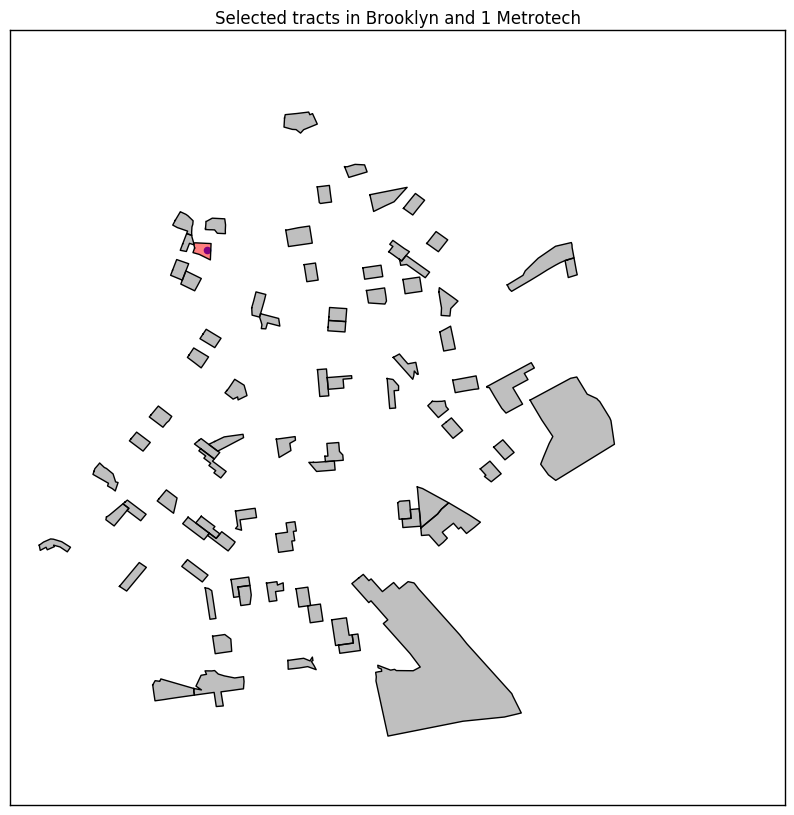

In [49]:
f, ax = pl.subplots(figsize=(10, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct10.plot(color="grey", ax=ax, alpha=.5)
# Select the row from the GeoDataFrame containing the tract identified above
cusp_shape = GeoDataFrame(ct_shape.loc[cuspind])
cusp_shape.transpose().plot(color='red', alpha=.5, ax=ax)
pl.scatter(mtech1.x, mtech1.y, color='blue', alpha=1)
pl.title("Selected tracts in Brooklyn and 1 Metrotech")

Figure 1. A plot of every 10 tracts in Kings County/Brooklyn. Highlighted in red is the tract containing 1 MetroTech and the coordinate of 1 MetroTech is shown inside it in blue.